In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("datasets/kc_house_data.csv").iloc[:100,2:6]
p=df.price
df=(df-df.mean())/df.std()
df.price=p
df.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,-0.505454,-1.368009,-1.055998
1,538000.0,-0.505454,0.350595,0.559282
2,180000.0,-1.769089,-1.368009,-1.532448
3,604000.0,0.758181,1.381758,-0.149582
4,510000.0,-0.505454,0.006874,-0.474962


In [9]:
Y=df["price"].tolist()
X=np.append(np.ones((100,1)),np.array(df[["bedrooms","sqft_living"]]),axis=1)
Xt=np.transpose(X)
W=np.linalg.inv(Xt.dot(X)).dot(Xt.dot(Y))
W

array([519149.35      ,  -4825.51092049, 200813.75770067])

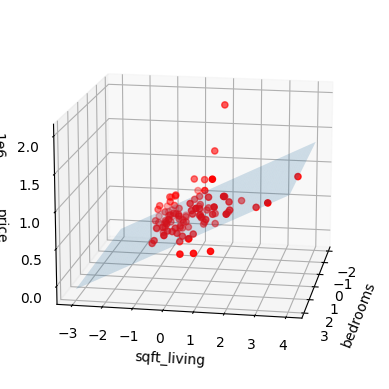

In [26]:
'''plot 3d points '''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["bedrooms"],df["sqft_living"],df["price"],c='r',marker='o')
ax.set_xlabel('bedrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
'''change the view angle'''
ax.view_init(15,10)
'''plot the plane'''
x1=np.linspace(-2,3,100)
x2=np.linspace(-3,4,100)
x1,x2=np.meshgrid(x1,x2)
z=W[0]+W[1]*x1+W[2]*x2
ax.plot_surface(x1,x2,z,alpha=0.2)
plt.show()
